In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

In [2]:
df = pd.read_csv("all_data/ppt_processed.csv")
df.head()

,review,token,rating,sentiment
0,Ugh I hated the last book in this series- what...,"['ugh', 'hat', 'last', 'book', 'in', 'series',...",1,0
1,"This started out strong, but it went downhill ...","['start', 'out', 'strong', 'but', 'go', 'downh...",1,0
2,"A decently written YA book, but I can't even c...","['decently', 'write', 'ya', 'book', 'but', 'ca...",1,0
3,This book simultaneously bored me to death and...,"['book', 'simultaneously', 'bore', 'death', 'a...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","['ugh', 'try', 'honestly', 'try', 'huge', 'fan...",1,0


In [3]:
df["token"] = df["token"].apply(lambda x: ast.literal_eval(x))
df.head()

,review,token,rating,sentiment
0,Ugh I hated the last book in this series- what...,"[ugh, hat, last, book, in, series, poor, way, ...",1,0
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0
3,This book simultaneously bored me to death and...,"[book, simultaneously, bore, death, annoy, hel...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0


In [4]:
df["num_words"] = df["token"].apply(lambda x: len(x))

In [16]:
df["ten"] = df["num_words"].apply(lambda x: 1 if (x > 10 and x <= 30) else 0)
df["thirty"] = df["num_words"].apply(lambda x: 1 if (x > 30 and x <= 50) else 0)
df["fifty"] = df["num_words"].apply(lambda x: 1 if (x > 50 and x <= 100) else 0)
df["hundred"] = df["num_words"].apply(lambda x: 1 if (x > 100 and x <= 200) else 0)
df["two_hundred"] = df["num_words"].apply(lambda x: 1 if (x > 200 and x <= 500) else 0)
df["five_hundred"] = df["num_words"].apply(lambda x: 1 if x > 500 else 0)
df["thousand"] = df["num_words"].apply(lambda x: 1 if (x > 500 and x <= 1000) else 0)

In [5]:
df.describe()

,rating,sentiment,num_words
count,20000.000000,20000.000000,20000.000000
mean,3.000000,0.500000,88.620350
std,1.581178,0.500013,125.832078
min,1.000000,0.000000,0.000000
25%,1.750000,0.000000,15.000000
50%,3.000000,0.500000,41.000000
75%,4.250000,1.000000,109.000000
max,5.000000,1.000000,2185.000000


In [18]:
print(df["ten"].sum())
print(df["thirty"].sum())
print(df["fifty"].sum())
print(df["hundred"].sum())
print(df["two_hundred"].sum())
print(df["five_hundred"].sum())
print(df["thousand"].sum())

4727
2705
3542
2797
2254
336
307


(array([6.580e+03, 3.692e+03, 2.238e+03, 1.470e+03, 1.027e+03, 7.490e+02,
        6.580e+02, 4.940e+02, 4.240e+02, 4.170e+02, 3.410e+02, 2.720e+02,
        2.250e+02, 2.170e+02, 1.710e+02, 1.450e+02, 1.190e+02, 1.060e+02,
        9.200e+01, 7.100e+01, 4.700e+01, 7.400e+01, 4.000e+01, 3.300e+01,
        3.600e+01, 4.000e+01, 2.200e+01, 2.100e+01, 2.700e+01, 2.400e+01,
        1.100e+01, 1.800e+01, 1.200e+01, 5.000e+00, 7.000e+00, 9.000e+00,
        5.000e+00, 3.000e+00, 1.200e+01, 2.000e+00, 1.000e+00, 3.000e+00,
        5.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        4.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

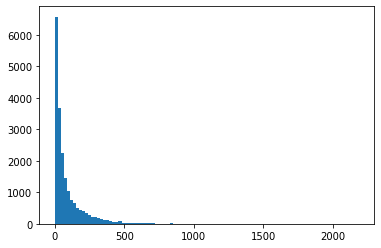

In [21]:
plt.hist(df["num_words"], bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcef9fb6970>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcef9fb6f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcef9fb66a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcef346d4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcef346d7c0>],
 'means': []}

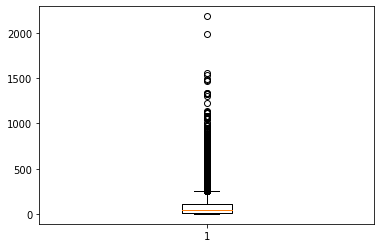

In [19]:
plt.boxplot(df["num_words"])

In [6]:
df2 = df[(df["num_words"] >= 15)]
df2 = df2.drop(["num_words"], axis=1)
df2.head()

,review,token,rating,sentiment
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0
5,I hate to give any book this low of a rating -...,"[hate, give, any, book, low, rat, know, take, ...",1,0
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0


In [7]:
df2["sentiment"].value_counts()

0    7741
1    7453
Name: sentiment, dtype: int64

In [8]:
df3 = df2[df2["sentiment"] == 0][:7000]
df4 = df2[df2["sentiment"] == 1][:7000]
df5 = pd.concat([df3, df4])
# df5 = df5.drop(["num_words"], axis=1)
df5

,review,token,rating,sentiment
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0
5,I hate to give any book this low of a rating -...,"[hate, give, any, book, low, rat, know, take, ...",1,0
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0
...,...,...,...,...
19354,"Loved it \n At times, the multiple plots got a...","[love, time, multiple, plot, get, little, conf...",5,1
19355,I was excited for this book from the first mom...,"[excite, book, first, moment, hear, about, ver...",5,1
19357,Awesome! A bit complex for a teen book so not ...,"[awesome, bite, complex, teen, book, so, not, ...",5,1
19358,Re-read April 2016 \n Anyone who has not read ...,"[read, april, anyone, not, read, destroy, will...",5,1


In [9]:
with pd.option_context("display.max_rows", 8, "display.max_colwidth", 100, "display.colheader_justify", "left"):
    display(df5)

,review,token,rating,sentiment
1,"This started out strong, but it went downhill fairly quickly. It's not like there weren't good t...","[start, out, strong, but, go, downhill, fairly, quickly, not, like, there, weren, good, things, ...",1,0
2,"A decently written YA book, but I can't even consider the ending to be one. More like its missin...","[decently, write, ya, book, but, can, even, consider, end, one, more, like, miss, last, few, cha...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fan of Scott Westerfeld...the Uglies series is among...","[ugh, try, honestly, try, huge, fan, scott, westerfeld, uglies, series, among, literary, favorit...",1,0
5,I hate to give any book this low of a rating - I know what it takes to actually finish a manuscr...,"[hate, give, any, book, low, rat, know, take, actually, finish, manuscript, get, through, proces...",1,0
...,...,...,...,...
19355,I was excited for this book from the first moment I heard about it. The very premise was somethi...,"[excite, book, first, moment, hear, about, very, premise, something, prick, interest, able, get,...",5,1
19357,Awesome! A bit complex for a teen book so not for reluctant readers. I can't wait for the others...,"[awesome, bite, complex, teen, book, so, not, reluctant, readers, can, wait, others, in, series,...",5,1
19358,"Re-read April 2016 \n Anyone who has not read ""Destroy Me"" will not truly understand Warner's in...","[read, april, anyone, not, read, destroy, will, not, truly, understand, warner, intentions, moti...",5,1
19359,I'll give this 4.5 stars. I really like how the author set up the world of TMI like 'whoa hardly...,"[give, star, really, like, how, author, set, up, world, tmi, like, whoa, hardly, no, one, think,...",5,1


In [10]:
df5 = df5.rename(columns={"token": "text"})
df5.head()

,review,text,rating,sentiment
1,"This started out strong, but it went downhill ...","[start, out, strong, but, go, downhill, fairly...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, but, can, even, co...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0
5,I hate to give any book this low of a rating -...,"[hate, give, any, book, low, rat, know, take, ...",1,0
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0


In [11]:
df5.to_csv("cleaned_data/cleaned_reviews_4.csv", index=False)

### new preprocess

In [5]:
df = pd.read_csv("cleaned_data/cleaned_reviews_2.csv")
df["text"] = df["text"].apply(lambda x: ast.literal_eval(x))
df["num_words"] = df["text"].apply(lambda x: len(x))
df.head()

,review,text,rating,sentiment,num_words
0,Ugh I hated the last book in this series- what...,"[ugh, hat, last, book, series, poor, way, end,...",1,0,9
1,"This started out strong, but it went downhill ...","[start, out, strong, go, downhill, fairly, qui...",1,0,73
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, can, even, conside...",1,0,30
3,This book simultaneously bored me to death and...,"[book, simultaneously, bore, death, annoy, hel...",1,0,10
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0,43


In [6]:
df2 = df[(df["num_words"] >= 15)]
df2 = df2.drop(["num_words"], axis=1)
df2.head()

,review,text,rating,sentiment
1,"This started out strong, but it went downhill ...","[start, out, strong, go, downhill, fairly, qui...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, can, even, conside...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0
5,I hate to give any book this low of a rating -...,"[hate, give, any, book, low, rat, know, take, ...",1,0
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0


In [7]:
df2["sentiment"].value_counts()

0    7607
1    7330
Name: sentiment, dtype: int64

In [8]:
df3 = df2[df2["sentiment"] == 0][:7000]
df4 = df2[df2["sentiment"] == 1][:7000]
df5 = pd.concat([df3, df4])
df5

,review,text,rating,sentiment
1,"This started out strong, but it went downhill ...","[start, out, strong, go, downhill, fairly, qui...",1,0
2,"A decently written YA book, but I can't even c...","[decently, write, ya, book, can, even, conside...",1,0
4,"Ugh...I tried, I honestly tried. I'm a huge fa...","[ugh, try, honestly, try, huge, fan, scott, we...",1,0
5,I hate to give any book this low of a rating -...,"[hate, give, any, book, low, rat, know, take, ...",1,0
6,Main points: \n 1. Never ever introduce a poin...,"[main, point, never, ever, introduce, point, v...",1,0
...,...,...,...,...
19528,Five stars just isn't enough to give this amaz...,"[five, star, just, isn, enough, give, amaze, e...",5,1
19529,This was an awesome sequel to Moving in Neutra...,"[awesome, sequel, move, neutral, can, not, wai...",5,1
19530,I don't know where to begin except I didn't wa...,"[don, know, begin, except, didn, want, book, e...",5,1
19531,"an amazing read - surprising, original and rea...","[amaze, read, surprise, original, really, take...",5,1


In [9]:
df5.to_csv("cleaned_data/cleaned_reviews_4.csv", index=False)